In [1]:
import re
import nltk
import time
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import HTML
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
from nltk.tokenize import sent_tokenize
import matplotlib.animation as animation

%matplotlib inline

# Basketball Over Time

In [2]:
# Read in the csv's for my datasets

# The salaries dataset contains salary information (in dollars) for almost twelve thousand basketball players who 
# played anywhere from 1990 to 2017. The dataset has 7 columns; Register Value, Player Name, Salary in $, 
# Season Start, Season End, Team, and Full Team Name. Overall four of the columns are numbers in decimal format, while
# the other three are strings (i.e. Player Name, Team, and Full Team Name). However, when importing the data it seems
# that the salary column is also in string format and season start/end are floats.
# source of dataset: https://www.kaggle.com/whitefero/nba-player-salary-19902017/data?
# Source: https://data.world/datadavis/nba-salaries

salaries = pd.read_csv('Salaries1990_2017.csv')



# The 'Players' csv is a dataset about basketball players from 1950 to 2017. It contains information such as 
# height (cm), weight (kg), college, birth_city, birth_year, birth_state, and player name. The player, college, 
# birth_city, and birth_state columns are represented as a string. The height, weight, and year columns are 
# represented as numbers. 
# Source: https://www.kaggle.com/drgilermo/nba-players-stats

players = pd.read_csv('Players.csv')





# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# The tpg, ppg, and misc datasets are all from the same website and contain the same information respectively. They #
# ony differ in the season I generated them from.                                                                   #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #



# The TPG is a dataset that represents Team per Game statistics. Columns in tpg include team name, games played, 
# minutes played, goals, goal attempts, goal percentages, rebounds, assists, steals, blocks, turnovers, 
# personal fouls, and points. Of course, all of these statistics are averages per game, hence the name team per game.
# All of these columns except the team name column are either integers or doubles. The team name is string format. 
# The tpg dataset has a row for every team in the NBA during that season.
# Source: https://www.basketball-reference.com/leagues/NBA_2019.html#team-stats-per_game::none
# Source: https://www.basketball-reference.com/leagues/NBA_2016.html#team-stats-per_game::none
# Source: https://www.basketball-reference.com/leagues/NBA_2006.html#team-stats-per_game::none
# Source: https://www.basketball-reference.com/leagues/NBA_1996.html#team-stats-per_game::none
# Source: https://www.basketball-reference.com/leagues/NBA_1986.html#team-stats-per_game::none
# Source: https://www.basketball-reference.com/leagues/ABA_1976.html#team-stats-per_game::none

tpg_18 = pd.read_csv('2018_TPG.csv')
tpg_15 = pd.read_csv('2015_TPG.csv')
tpg_05 = pd.read_csv('2005_TPG.csv')
tpg_95 = pd.read_csv('1995_TPG.csv')
tpg_85 = pd.read_csv('1985_TPG.csv')
tpg_75 = pd.read_csv('1975_TPG.csv')



# The PPG is a dataset that represents information based on Player per Game averages. It contains much of the same
# information as the TPG dataset except it is broken down by player rather than team averages. The main differences
# between the datasets are that ppg contains columns such as player, position, age, effective shooting percentage, 
# and games started. Similarly all of the columns except player name, team name, and position are numbers either 
# integers or doubles. The others are strings. The ppg dataset has a row for every player that was in the NBA for that
# season as well as their corresponding team.
# Source: https://www.basketball-reference.com/leagues/NBA_2019_per_game.html#per_game_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_2016_per_game.html#per_game_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_2006_per_game.html#per_game_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_1996_per_game.html#per_game_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_1986_per_game.html#per_game_stats::none
# Source: https://www.basketball-reference.com/leagues/ABA_1976_per_game.html#per_game_stats::none


ppg_18 = pd.read_csv('2018_PPG.csv')
ppg_15 = pd.read_csv('2015_PPG.csv')
ppg_05 = pd.read_csv('2005_PPG.csv')
ppg_95 = pd.read_csv('1995_PPG.csv')
ppg_85 = pd.read_csv('1985_PPG.csv')
ppg_75 = pd.read_csv('1975_PPG.csv')



# The MISC dataset is a congregation of miscellaneous data about teams. I only needed this dataset to append
# information to the tpg dataset as the misc dataset contains information about the teams such as average 
# age per team, team wins/losses, offensive/defensive/net ratings, pace as an estimation of possesions. And some 
# very unnecessary information such as pythagorean wins/losses, strenght of schedule, simple rating system...all of
# these statistics were not important for my dh project and will be discarded as I don't know what their significance
# is, what they are, or how to use them for data analysis. In other words, they are unhelpful statistics. Again, all 
# most all of the statistics are numbers (ints and doubles) except the team name column which is a string.
# Source: https://www.basketball-reference.com/leagues/NBA_2019.html#misc_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_2016.html#misc_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_2006.html#misc_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_1996.html#misc_stats::none
# Source: https://www.basketball-reference.com/leagues/NBA_1986.html#misc_stats::none
# Source: https://www.basketball-reference.com/leagues/ABA_1976.html#misc_stats::none

misc_18 = pd.read_csv('2018_MISC.csv')
misc_15 = pd.read_csv('2015_MISC.csv')
misc_05 = pd.read_csv('2005_MISC.csv')
misc_95 = pd.read_csv('1995_MISC.csv')
misc_85 = pd.read_csv('1985_MISC.csv')
misc_75 = pd.read_csv('1975_MISC.csv')

# Data Cleaning 

In [3]:
# Dropping unnecessary columns in place 

salaries.dropna(axis=0, inplace=True)
salaries.drop(['Register Value', 'Season End'], axis=1, inplace=True)
salaries.columns = ['Player', 'Salary', 'Season Start', 'Tm', 'Team']

players.dropna(axis=0, inplace=True)
players.drop(['Unnamed: 0', 'collage', 'birth_city', 'birth_state'], axis=1, inplace=True)

tpg_18.drop(['Rk'], axis=1, inplace=True)
tpg_15.drop(['Rk'], axis=1, inplace=True)
tpg_05.drop(['Rk'], axis=1, inplace=True)
tpg_95.drop(['Rk'], axis=1, inplace=True)
tpg_85.drop(['Rk'], axis=1, inplace=True)
tpg_75.drop(['Rk'], axis=1, inplace=True)

misc_18.drop(['Rk', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr'], axis=1, inplace=True)
misc_15.drop(['Rk', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr'], axis=1, inplace=True)
misc_05.drop(['Rk', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr'], axis=1, inplace=True)
misc_95.drop(['Rk', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr'], axis=1, inplace=True)
misc_85.drop(['Rk', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr'], axis=1, inplace=True)
misc_75.drop(['Rk', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr'], axis=1, inplace=True)

ppg_18.drop(['Rk', 'GS', 'G'], axis=1, inplace=True)
ppg_15.drop(['Rk', 'GS', 'G'], axis=1, inplace=True)
ppg_05.drop(['Rk', 'GS', 'G'], axis=1, inplace=True)
ppg_95.drop(['Rk', 'GS', 'G'], axis=1, inplace=True)
ppg_85.drop(['Rk', 'GS', 'G'], axis=1, inplace=True)
ppg_75.drop(['Rk', 'GS', 'G'], axis=1, inplace=True)

In [4]:
# Cleaning the 'Player' column to remove all text and special characters besides the player name
# For the players dataset I am converting height and weight to US metrics as well as rounding the years 
# to whole numbers (i.e. 1980.0 => 1980)

salaries['Salary'] = salaries['Salary'].replace('[\$,]', '', regex=True).astype(float).apply(lambda x: int(x))
salaries['Season Start'] = salaries['Season Start'].apply(lambda x: int(x))

players['born'] = players['born'].apply(lambda x: int(x))
players['height'] = players['height'].apply(lambda x: x * .39)
players['weight'] = players['weight'].apply(lambda x: x * 2.205)

tpg_18['Team'] = tpg_18['Team'].apply(lambda x: x.replace("*", ""))
tpg_15['Team'] = tpg_15['Team'].apply(lambda x: x.replace("*", ""))
tpg_05['Team'] = tpg_05['Team'].apply(lambda x: x.replace("*", ""))
tpg_95['Team'] = tpg_95['Team'].apply(lambda x: x.replace("*", ""))
tpg_85['Team'] = tpg_85['Team'].apply(lambda x: x.replace("*", ""))
tpg_75['Team'] = tpg_75['Team'].apply(lambda x: x.replace("*", ""))

misc_18['Team'] = misc_18['Team'].apply(lambda x: x.replace("*", ""))
misc_15['Team'] = misc_15['Team'].apply(lambda x: x.replace("*", ""))
misc_05['Team'] = misc_05['Team'].apply(lambda x: x.replace("*", ""))
misc_95['Team'] = misc_95['Team'].apply(lambda x: x.replace("*", ""))
misc_85['Team'] = misc_85['Team'].apply(lambda x: x.replace("*", ""))
misc_75['Team'] = misc_75['Team'].apply(lambda x: x.replace("*", ""))

ppg_18['Player'] = ppg_18['Player'].map(lambda x: re.findall(r'^(.*?)\\', x)[0]).apply(lambda x: x.replace("*", ""))
ppg_15['Player'] = ppg_15['Player'].map(lambda x: re.findall(r'^(.*?)\\', x)[0]).apply(lambda x: x.replace("*", ""))
ppg_05['Player'] = ppg_05['Player'].map(lambda x: re.findall(r'^(.*?)\\', x)[0]).apply(lambda x: x.replace("*", ""))
ppg_95['Player'] = ppg_95['Player'].map(lambda x: re.findall(r'^(.*?)\\', x)[0]).apply(lambda x: x.replace("*", ""))
ppg_85['Player'] = ppg_85['Player'].map(lambda x: re.findall(r'^(.*?)\\', x)[0]).apply(lambda x: x.replace("*", ""))
ppg_75['Player'] = ppg_75['Player'].map(lambda x: re.findall(r'^(.*?)\\', x)[0]).apply(lambda x: x.replace("*", ""))

In [5]:
# Joining miscellaneous and team per game tables to avoid redundancy

nba18 = pd.merge(left=tpg_18, right=misc_18, how='inner', on='Team')
nba15 = pd.merge(left=tpg_15, right=misc_15, how='inner', on='Team')
nba05 = pd.merge(left=tpg_05, right=misc_05, how='inner', on='Team')
nba95 = pd.merge(left=tpg_95, right=misc_95, how='inner', on='Team')
nba85 = pd.merge(left=tpg_85, right=misc_85, how='inner', on='Team')
nba75 = pd.merge(left=tpg_75, right=misc_75, how='inner', on='Team')

nba18.drop(['G', '3PAr', 'TOV'], axis=1, inplace=True)
nba15.drop(['G', '3PAr', 'TOV'], axis=1, inplace=True)
nba05.drop(['G', '3PAr', 'TOV'], axis=1, inplace=True)
nba95.drop(['G', '3PAr', 'TOV'], axis=1, inplace=True)
nba85.drop(['G', '3PAr', 'TOV'], axis=1, inplace=True)
nba75.drop(['G', '3PAr', 'TOV'], axis=1, inplace=True)

# Exploratory Data Analysis

In [6]:
# Grouping the salaries dataset by year to get the average salary made that year and then sorting by year as well. 
# Extracting the year column to act as the x axis and salaries on the y axis.

avgSalary = list(salaries.groupby(by='Season Start').mean().reset_index().sort_values(by='Season Start')['Salary'])
years = list(salaries.groupby(by='Season Start').mean().reset_index().sort_values(by='Season Start')['Season Start'])

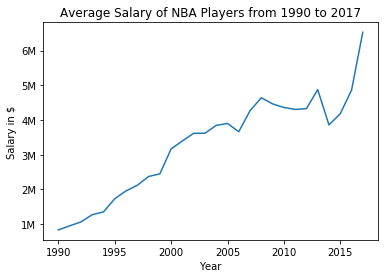

In [7]:
# Plotting average salary of NBA players from 1990 to 2017. Of course the highest salaries have also changed 
# dramatically and will also follow the same general upward trend. The highest paid players in recent years have made
# upwards of around $35 million from the NBA alone, this figure would be much higher if it were to include 
# endorsements, a great post on this is from @Stat.mi on instagram...check out this post: 
# https://www.instagram.com/p/CCCW53BlLG1/?utm_source=ig_web_copy_link

plt.title('Average Salary of NBA Players from 1990 to 2017')
plt.ylabel('Salary in $')
plt.xlabel('Year')
plt.yticks(ticks=np.arange(1000000, 7000000, 1000000), labels=['1M', '2M', '3M', '4M', '5M', '6M'])
plt.plot(years, avgSalary);

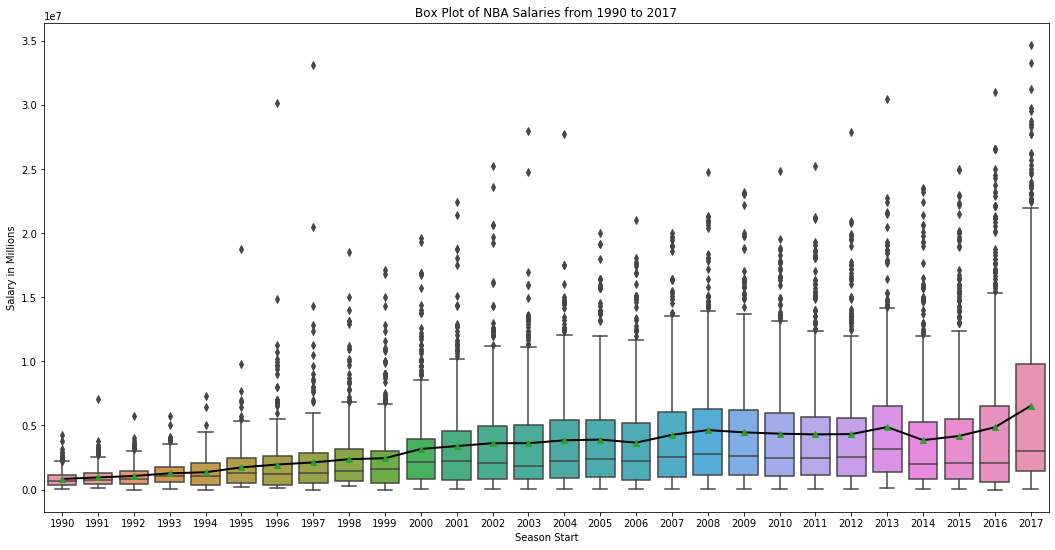

In [8]:
# Creating a Box Plot for salaries in the NBA from 1990 to 2017 and an overlay of the mean values of each season.

plt.figure(figsize=(18, 9))
sns.boxplot(x='Season Start', y='Salary', data=salaries, showmeans=True)
plt.plot(avgSalary,'black',linewidth=2)
plt.ylabel('Salary in Millions')
plt.title('Box Plot of NBA Salaries from 1990 to 2017');

In [9]:
# Grouping the players dataset by year born in order to extract average height and weight for the players during
# that corresponding year to plot a change over time. 

avgHeight = players.groupby(by='born').mean().reset_index()['height'] #.sort_values(by='born')['height']
avgWeight = players.groupby(by='born').mean().reset_index()['weight'] #.sort_values(by='born')['weight']
years = players.groupby(by='born').mean().reset_index()['born']       #.sort_values(by='born').index)

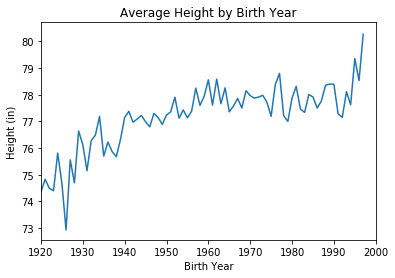

In [10]:
# Plotting average height in the NBA by year born.

plt.plot(years, avgHeight)
plt.xlabel('Birth Year')
plt.ylabel('Height (in)')
plt.title('Average Height by Birth Year')
plt.xlim(1920, 2000);

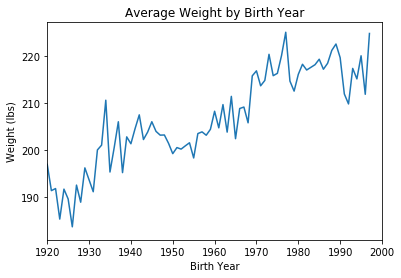

In [11]:
# Plotting average NBA player weight by birth year.

plt.plot(years, avgWeight)
plt.xlabel('Birth Year')
plt.ylabel('Weight (lbs)')
plt.title('Average Weight by Birth Year')
plt.xlim(1920, 2000);

In [12]:
# Grouping by Age to get average, oldest, and youngest age per season

nbaAverageAge18 = round(ppg_18['Age'].mean(), 2)
nbaAverageAge15 = round(ppg_15['Age'].mean(), 2)
nbaAverageAge05 = round(ppg_05['Age'].mean(), 2)
nbaAverageAge95 = round(ppg_95['Age'].mean(), 2)
nbaAverageAge85 = round(ppg_85['Age'].mean(), 2)
nbaAverageAge75 = round(ppg_75['Age'].mean(), 2)

nbaAverageAgesPerSeason = [nbaAverageAge75, nbaAverageAge85, nbaAverageAge95, 
                           nbaAverageAge05, nbaAverageAge15, nbaAverageAge18]

nbaOldestAgesPerSeason = [ppg_75['Age'].max(), ppg_85['Age'].max(), ppg_95['Age'].max(), 
                           ppg_05['Age'].max(), ppg_15['Age'].max(), ppg_18['Age'].max()]

nbaYoungestAgesPerSeason = [ppg_75['Age'].min(), ppg_85['Age'].min(), ppg_95['Age'].min(), 
                           ppg_05['Age'].min(), ppg_15['Age'].min(), ppg_18['Age'].min()]

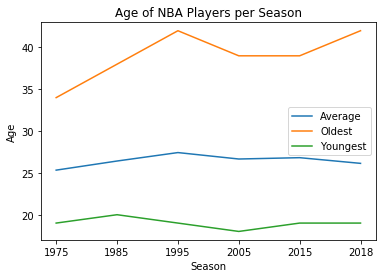

In [13]:
# Plotting average age of basketball players over time by season. Players are getting older over time, 
# which can suggest longer careers in the NBA. 

plt.plot(nbaAverageAgesPerSeason, label='Average')
plt.plot(nbaOldestAgesPerSeason, label='Oldest')
plt.plot(nbaYoungestAgesPerSeason, label='Youngest')
plt.title('Age of NBA Players per Season')
plt.ylabel('Age')
plt.ylim([17, 43])
labels = ['1975', '1985', '1995', '2005', '2015', '2018']
plt.xticks(np.arange(0, 6, 1), labels)
plt.xlabel('Season')
plt.legend();

In [14]:
# Appending a column describing a win/loss ratio for each season based on team and rounding the percentage 
# to 2 decimal places

nba18['WL%'] = nba18['W'] / nba18['L']
nba18['WL%'] = nba18['WL%'].apply(lambda x: round(x, 2))

nba15['WL%'] = nba15['W'] / nba15['L']
nba15['WL%'] = nba15['WL%'].apply(lambda x: round(x, 2))

nba05['WL%'] = nba05['W'] / nba05['L']
nba05['WL%'] = nba05['WL%'].apply(lambda x: round(x, 2))

nba95['WL%'] = nba95['W'] / nba95['L']
nba95['WL%'] = nba95['WL%'].apply(lambda x: round(x, 2))

nba85['WL%'] = nba85['W'] / nba85['L']
nba85['WL%'] = nba85['WL%'].apply(lambda x: round(x, 2))

nba75['WL%'] = nba75['W'] / nba75['L']
nba75['WL%'] = nba75['WL%'].apply(lambda x: round(x, 2))

In [15]:
# Gathering average and best win loss percentages by season.

averageWinLossPercentage = [nba75['WL%'].mean(), nba85['WL%'].mean(), nba95['WL%'].mean(), 
                            nba05['WL%'].mean(), nba15['WL%'].mean(), nba18['WL%'].mean()]

bestWinLossPercentage = [max(nba75['WL%']), max(nba85['WL%']), max(nba95['WL%']), 
                         max(nba05['WL%']), max(nba15['WL%']), max(nba18['WL%'])]

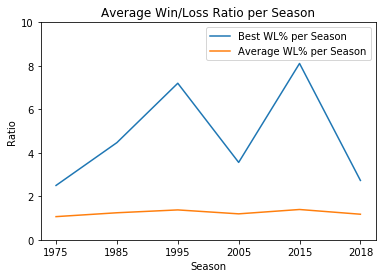

In [16]:
# Plotting the best & average Win/Loss records per season. You will notice two peaks, one in 1995 & the other in 2015.
# In '95 you had the Chicago Bulls with players such as Michael Jordan, Scottie Pippin, Dennis Rodman, & Steve Kerr. 
# Ironically, Steve Kerr was the coach for the Golden State Warriors in 2015 and remains so today. In '15 you had GSW 
# with players such as Stephen Curry, Klay Thompson, Draymond Green, and Andre Iguodala. Overall, however, these were 
# considered undefeatable teams. Interestingly, the average win/loss percentage has remained roughly the same.


plt.plot(bestWinLossPercentage, label='Best WL% per Season')
plt.plot(averageWinLossPercentage, label='Average WL% per Season')
plt.title('Average Win/Loss Ratio per Season')
plt.ylabel('Ratio')
plt.ylim([0, 10])
labels = ['1975', '1985', '1995', '2005', '2015', '2018']
plt.xticks(np.arange(0, 6, 1), labels)
plt.xlabel('Season')
plt.legend();

In [17]:
for col in list(ppg_75.columns):
    print(col, end=' ')

Player Pos Age Tm MP FG FGA FG% 3P 3PA 3P% 2P 2PA 2P% eFG% FT FTA FT% ORB DRB TRB AST STL BLK TOV PF PTS 

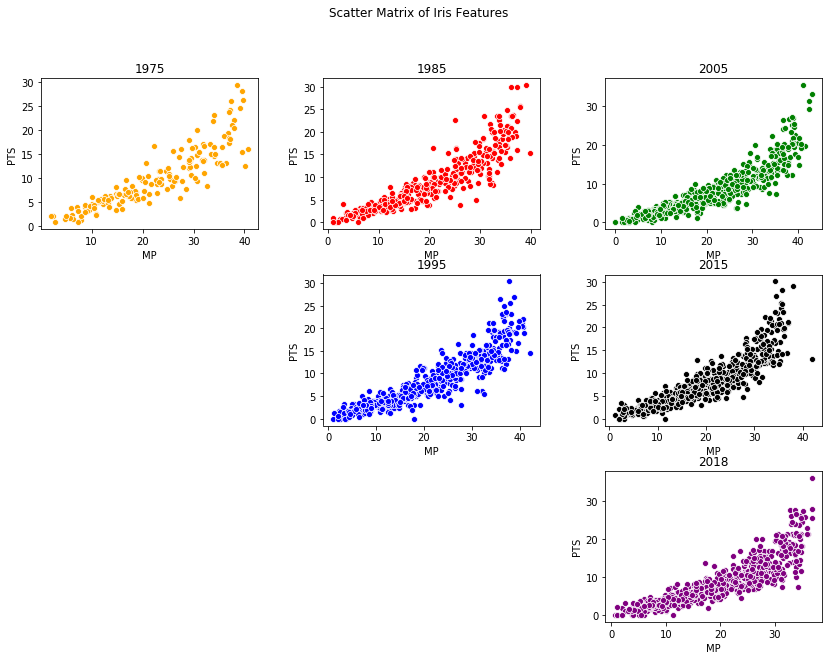

In [18]:
# For the next couple cells I am just trying to find potential correlations between attributes in the ppg datasets

dfs = [ppg_75, ppg_85, ppg_95, ppg_05, ppg_15, ppg_18]
colors = ['orange', 'red', 'blue', 'green', 'black', 'purple']
years = ['1975', '1985', '1995', '2005', '2015', '2018']
index = [1, 2, 5, 3, 6, 9]

plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='MP', y='PTS', data=dfs[i], color=colors[i])
    plt.title(years[i])

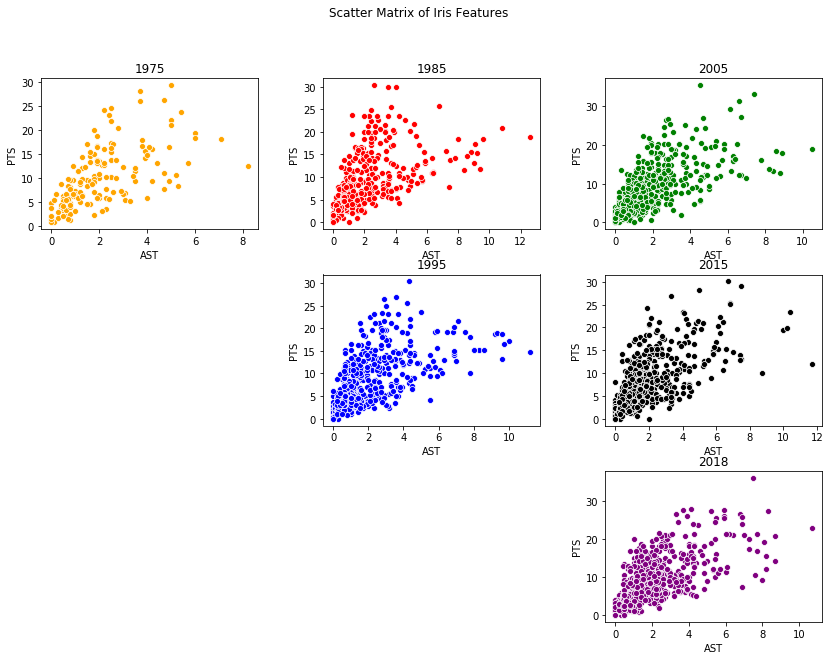

In [19]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='AST', y='PTS', data=dfs[i], color=colors[i])
    plt.title(years[i])

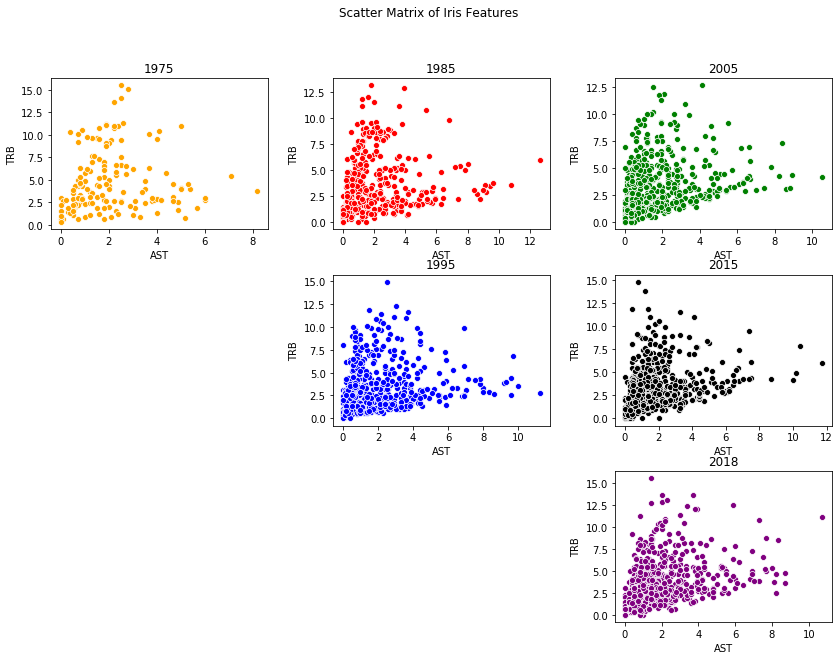

In [20]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='AST', y='TRB', data=dfs[i], color=colors[i])
    plt.title(years[i])

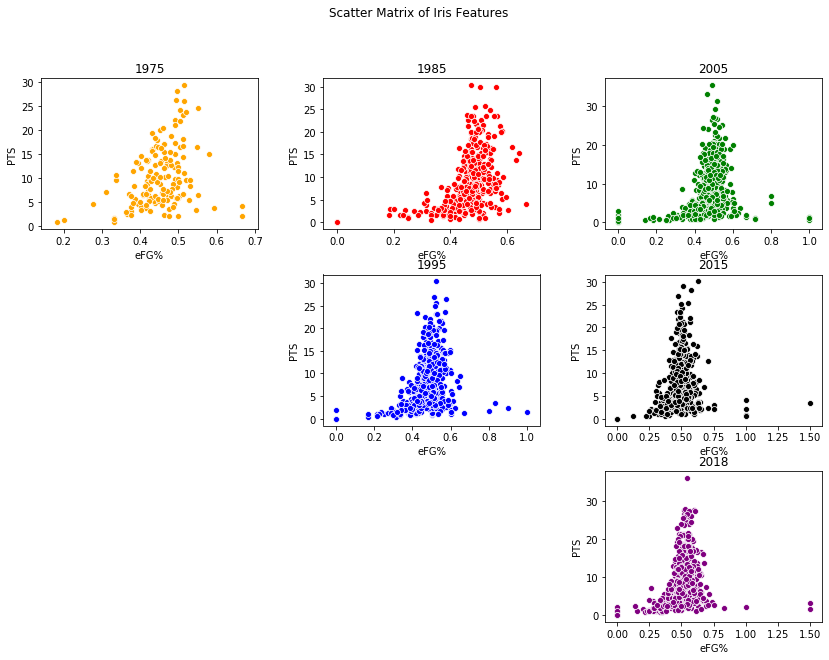

In [21]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='eFG%', y='PTS', data=dfs[i], color=colors[i])
    plt.title(years[i])

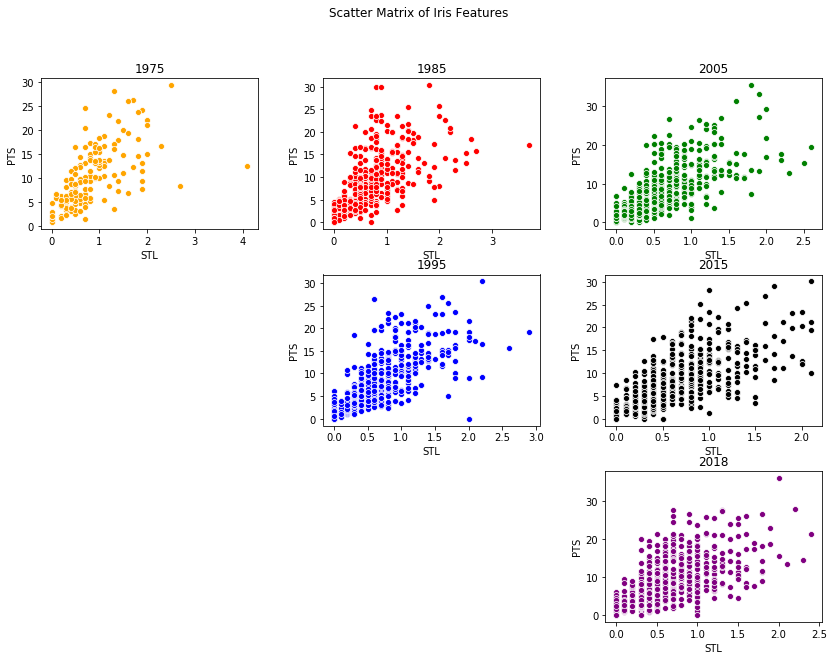

In [22]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='STL', y='PTS', data=dfs[i], color=colors[i])
    plt.title(years[i])

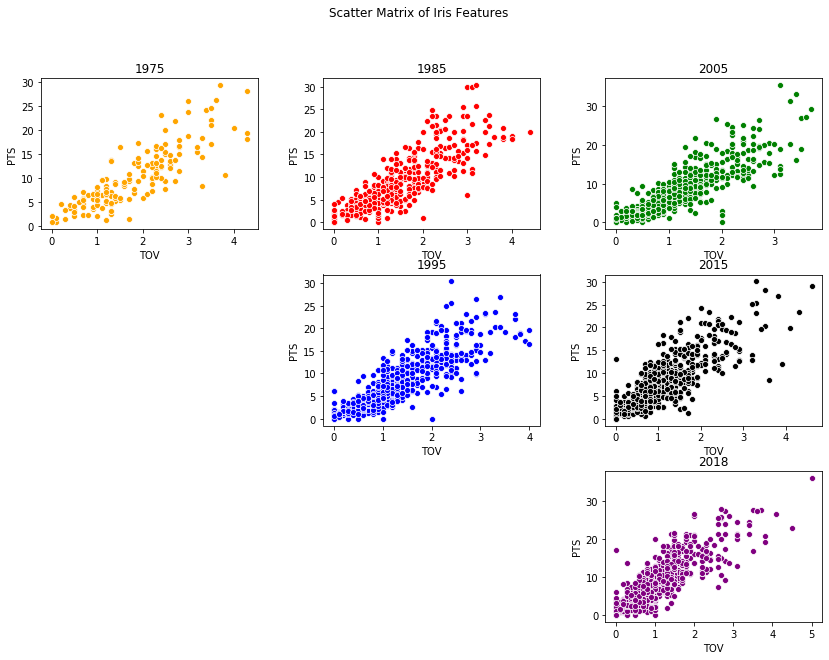

In [23]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='TOV', y='PTS', data=dfs[i], color=colors[i])
    plt.title(years[i])

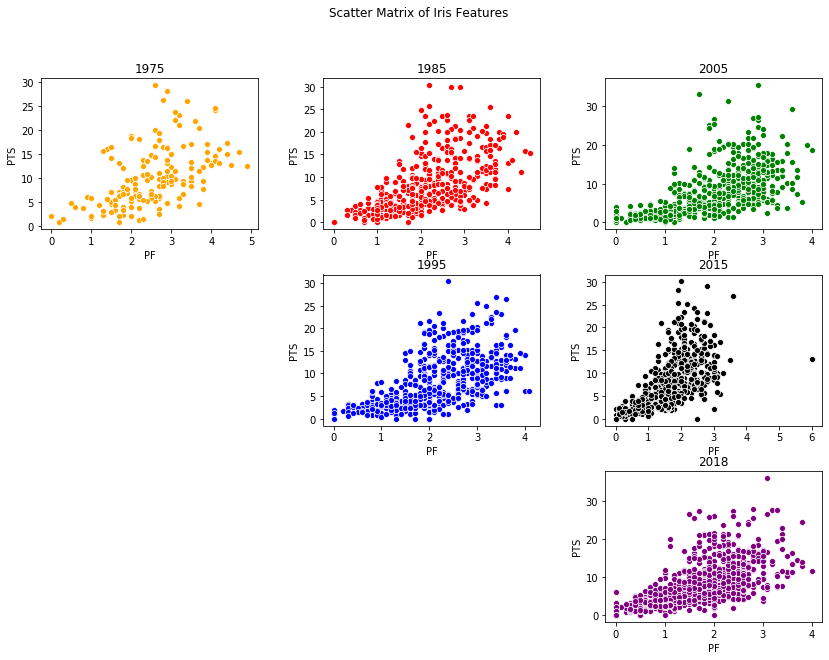

In [24]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='PF', y='PTS', data=dfs[i], color=colors[i])
    plt.title(years[i])

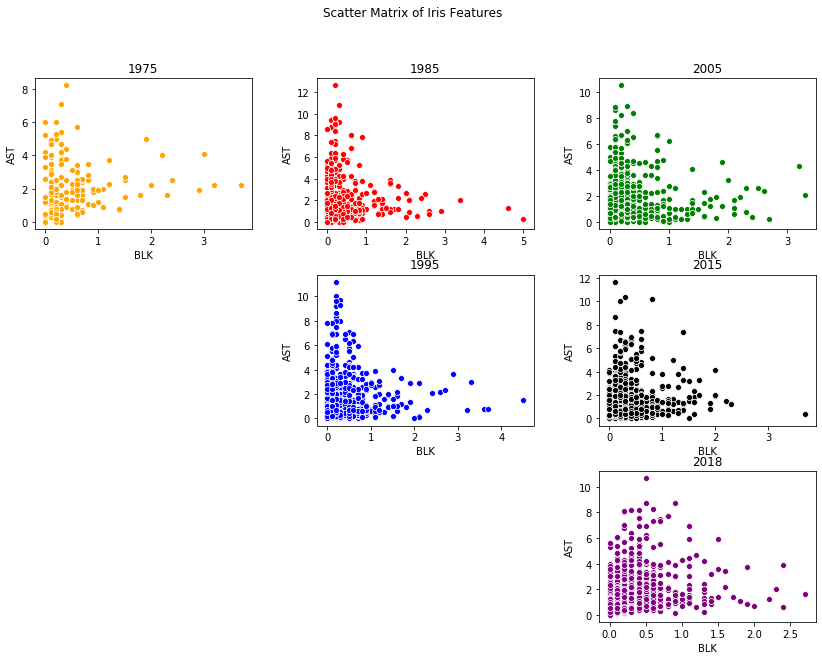

In [25]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(index)):
    plt.subplot(3, 3, index[i])
    sns.scatterplot(x='BLK', y='AST', data=dfs[i], color=colors[i])
    plt.title(years[i])

In [26]:
# Gathering average statistics for assists, steals, blocks, and personal fouls to analyze the change over time. 

assists = [nba75['AST'].mean(), nba85['AST'].mean(), nba95['AST'].mean(), 
           nba05['AST'].mean(), nba15['AST'].mean(), nba18['AST'].mean()]

steals = [nba75['STL'].mean(), nba85['STL'].mean(), nba95['STL'].mean(), 
          nba05['STL'].mean(), nba15['STL'].mean(), nba18['STL'].mean()]

blocks = [nba75['BLK'].mean(), nba85['BLK'].mean(), nba95['BLK'].mean(), 
          nba05['BLK'].mean(), nba15['BLK'].mean(), nba18['BLK'].mean()]

fouls = [nba75['PF'].mean(), nba85['PF'].mean(), nba95['PF'].mean(), 
         nba05['PF'].mean(), nba15['PF'].mean(), nba18['PF'].mean()]

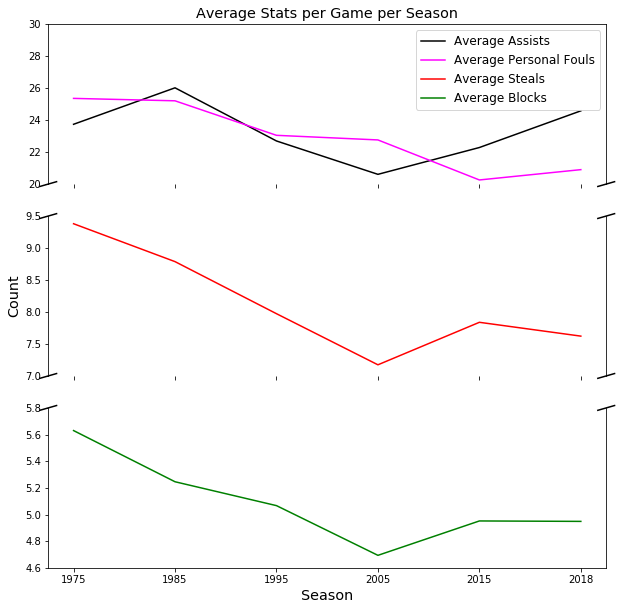

In [27]:
# Code to generate this plot was heavily based on the matplotlib documentation example at: 
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/broken_axis.html
# You will notice that the number of steals, blocks, and assists took a sharp decrease in 2005. In addition, the 
# number of personal fouls in 2005 was relatively high. I am not sure why that is, but it is intriguing nonetheless. 
# Generally, the number of personal fouls, steals, and blocks have a decreasing trajectory except the number of 
# assists. After 2005, the number of assists have a sharp increasing slope. 

f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

ax.plot(assists, label='Average Assists', color='black')
ax.plot(fouls, label='Average Personal Fouls', color='magenta')
ax.plot(steals, label='Average Steals', color='red')
ax.plot(blocks, label='Average Blocks', color='g')

ax2.plot(assists, label='Average Assists', color='black')
ax2.plot(fouls, label='Average Personal Fouls', color='magenta')
ax2.plot(steals, label='Average Steals', color='red')
ax2.plot(blocks, label='Average Blocks', color='g')

ax3.plot(assists, label='Average Assists', color='black')
ax3.plot(fouls, label='Average Personal Fouls', color='magenta')
ax3.plot(steals, label='Average Steals', color='red')
ax3.plot(blocks, label='Average Blocks', color='g')

ax.set_ylim(20, 30)  
ax2.set_ylim(7, 9.5)
ax3.set_ylim(4.6, 5.8)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)

d = .015  

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  
ax2.plot((-d, +d), (-d, +d), **kwargs)        
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

kwargs.update(transform=ax3.transAxes)  
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  

ax.set_title('Average Stats per Game per Season', fontsize='x-large')
ax2.set_ylabel('Count', fontsize='x-large')
labels = ['1975', '1985', '1995', '2005', '2015', '2018']
plt.xticks(np.arange(0, 6, 1), labels)
plt.xlabel('Season', fontsize='x-large')
ax.legend(loc='upper right', fontsize='large')
plt.show();

# Findings

In [28]:
# Gathering the average number of 3 pointers made by each position per season, since overall 3 pointer attempts or 
# 3 pointers made would not make sense in this case since we are trying to analyzie over time. 3 pointer attemps and 
# shots made in total could be greatly influence by size of the nba, thus we must take an average. 

posStats18 = ppg_18.groupby(by='Pos').mean().drop(['PF-SF', 'SF-SG', 'SG-PF', 'C-PF', 'PF-C', 'SG-SF'])
posStats15 = ppg_15.groupby(by='Pos').mean().drop(['PF-C', 'SG-SF'])
posStats05 = ppg_05.groupby(by='Pos').mean().drop(['PG-SG', 'SF-PF', 'PF-SF', 'SF-SG', 'C-PF', 'PF-C', 'SG-SF'])
posStats95 = ppg_95.groupby(by='Pos').mean().drop(['PF-C', 'SG-SF'])
posStats85 = ppg_85.groupby(by='Pos').mean().drop(['PG-SG', 'SF-PF'])
posStats75 = ppg_75.groupby(by='Pos').mean().drop(['PF-SF', 'C-PF', 'PF-C', 'SG-PG'])

In [29]:
# Gathering data in chronological order to prepare for plotting.

sg = [round(posStats75.loc['SG']['3PA'], 1), round(posStats85.loc['SG']['3PA'], 1), round(posStats95.loc['SG']['3PA'], 1)
     ,round(posStats05.loc['SG']['3PA'], 1), round(posStats15.loc['SG']['3PA'], 1), round(posStats18.loc['SG']['3PA'], 1)]

pg = [round(posStats75.loc['PG']['3PA'], 1), round(posStats85.loc['PG']['3PA'], 1), round(posStats95.loc['PG']['3PA'], 1)
     ,round(posStats05.loc['PG']['3PA'], 1), round(posStats15.loc['PG']['3PA'], 1), round(posStats18.loc['PG']['3PA'], 1)]

sf = [round(posStats75.loc['SF']['3PA'], 1), round(posStats85.loc['SF']['3PA'], 1), round(posStats95.loc['SF']['3PA'], 1)
     ,round(posStats05.loc['SF']['3PA'], 1), round(posStats15.loc['SF']['3PA'], 1), round(posStats18.loc['SF']['3PA'], 1)]

pf = [round(posStats75.loc['PF']['3PA'], 1), round(posStats85.loc['PF']['3PA'], 1), round(posStats95.loc['PF']['3PA'], 1)
     ,round(posStats05.loc['PF']['3PA'], 1), round(posStats15.loc['PF']['3PA'], 1), round(posStats18.loc['PF']['3PA'], 1)]

c = [round(posStats75.loc['C']['3PA'], 1), round(posStats85.loc['C']['3PA'], 1), round(posStats95.loc['C']['3PA'], 1),
     round(posStats05.loc['C']['3PA'], 1), round(posStats15.loc['C']['3PA'], 1), round(posStats18.loc['C']['3PA'], 1)]



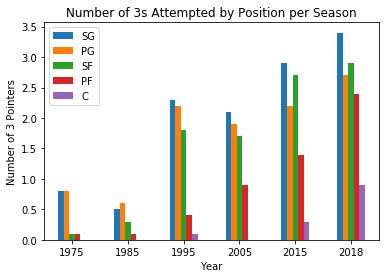

In [30]:
# Plotting overall number of 3's attempts by position per season. You will notice that shooting guard, point gaurd, 
# and small forward are typically the position that score the most 3's. More importantly, however, you can clearly see
# that the average number of 3 pointers attempted has generally gone up dramatically. It is important that we are 
# talking about averages since if we were to do a cumulative sum the size of the NBA could have a large effect and 
# potnetially skew the data. It is also important to note that we are talking about the number of 3 pointers attempted
# regardless if the shot was made or not since we just want to know if players are shooting more 3's than before. 

index = ['1975', '1985', '1995', '2005', '2015', '2018']
df = pd.DataFrame({'SG': sg,'PG': pg,'SF': sf,'PF': pf,'C': c}, index=index)
ax = df.plot.bar(rot=0)
plt.title('Number of 3s Attempted by Position per Season')
plt.ylabel('Number of 3 Pointers')
plt.xlabel('Year');

In [31]:
# Again gathering data for plot, but this time it is the number of 2 pointers attempted as opposed to 3 pointers.

sg = [round(posStats75.loc['SG']['2PA'], 1), round(posStats85.loc['SG']['2PA'], 1), round(posStats95.loc['SG']['2PA'], 1)
     ,round(posStats05.loc['SG']['2PA'], 1), round(posStats15.loc['SG']['2PA'], 1), round(posStats18.loc['SG']['2PA'], 1)]

pg = [round(posStats75.loc['PG']['2PA'], 1), round(posStats85.loc['PG']['2PA'], 1), round(posStats95.loc['PG']['2PA'], 1)
     ,round(posStats05.loc['PG']['2PA'], 1), round(posStats15.loc['PG']['2PA'], 1), round(posStats18.loc['PG']['2PA'], 1)]

sf = [round(posStats75.loc['SF']['2PA'], 1), round(posStats85.loc['SF']['2PA'], 1), round(posStats95.loc['SF']['2PA'], 1)
     ,round(posStats05.loc['SF']['2PA'], 1), round(posStats15.loc['SF']['2PA'], 1), round(posStats18.loc['SF']['2PA'], 1)]

pf = [round(posStats75.loc['PF']['2PA'], 1), round(posStats85.loc['PF']['2PA'], 1), round(posStats95.loc['PF']['2PA'], 1)
     ,round(posStats05.loc['PF']['2PA'], 1), round(posStats15.loc['PF']['2PA'], 1), round(posStats18.loc['PF']['2PA'], 1)]

c = [round(posStats75.loc['C']['2PA'], 1), round(posStats85.loc['C']['2PA'], 1), round(posStats95.loc['C']['2PA'], 1),
     round(posStats05.loc['C']['2PA'], 1), round(posStats15.loc['C']['2PA'], 1), round(posStats18.loc['C']['2PA'], 1)]



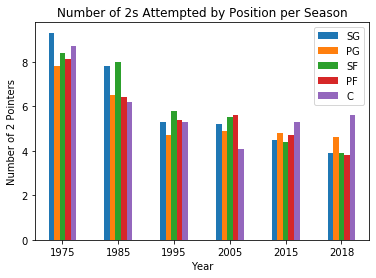

In [32]:
# Plotting average number of 2's attemptes by position per season. You will notice that there is a general downward
# trend in attempting a 2 pointer. In contrast to 3 pointers, you will also notice that centers are taking the most 
# 2 pointers. Interestingly, you will notice that shooting gaurds and small forwards attempting the 2 pointer has also
# decreased which could indicate that in more recent years those position players are less inclined to attempt a
# 2 pointer and could be instead focusing on attempting 3 pointers.

index = ['1975', '1985', '1995', '2005', '2015', '2018']
df = pd.DataFrame({'SG': sg,'PG': pg,'SF': sf,'PF': pf,'C': c}, index=index)
ax = df.plot.bar(rot=0)
plt.title('Number of 2s Attempted by Position per Season')
plt.ylabel('Number of 2 Pointers')
plt.xlabel('Year');

12.83% of players in the 2018 NBA season on average per game scored more 3 pointers than two pointers


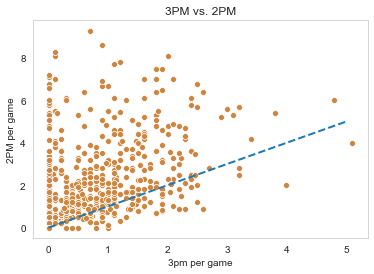

In [33]:
# Scatter plot showing the percentage of players who make more three pointers than two pointers on average per game.

ppg18 = ppg_18[['Player', '3P', '2P']]
ppg18 = ppg18.groupby(by='Player').mean().reset_index()
ppg18.columns = ['Player', 'three', 'two']

sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(x='three', y='two', data=ppg18, color='peru');
plt.xlabel('3pm per game')
plt.ylabel('2PM per game')
ax.set_title('3PM vs. 2PM')
plt.plot([0, 5], [0, 5], '--', linewidth=2);

temp = len(ppg18[ppg18['three'] > ppg18['two']])
length = len(ppg18)
perc = temp/length
print(str(round(perc*100, 2)) + 
      '% of players in the 2018 NBA season on average per game scored more 3 pointers than two pointers')

8.82% of players in the 2015 NBA season on average per game scored more 3 pointers than two pointers


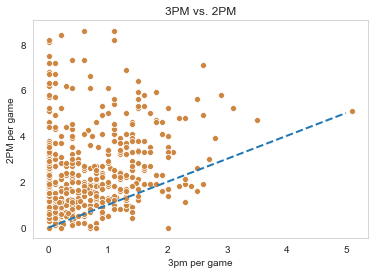

In [34]:
# Scatter plot showing the percentage of players who make more three pointers than two pointers on average per game.

ppg15 = ppg_15[['Player', '3P', '2P']]
ppg15 = ppg15.groupby(by='Player').mean().reset_index()
ppg15.columns = ['Player', 'three', 'two']

sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(x='three', y='two', data=ppg15, color='peru');
plt.xlabel('3pm per game')
plt.ylabel('2PM per game')
ax.set_title('3PM vs. 2PM')
plt.plot([0, 5], [0, 5], '--', linewidth=2);

temp = len(ppg15[ppg15['three'] > ppg15['two']])
length = len(ppg15)
perc = temp/length
print(str(round(perc*100, 2)) + 
      '% of players in the 2015 NBA season on average per game scored more 3 pointers than two pointers')

2.62% of players in the 2005 NBA season on average per game scored more 3 pointers than two pointers


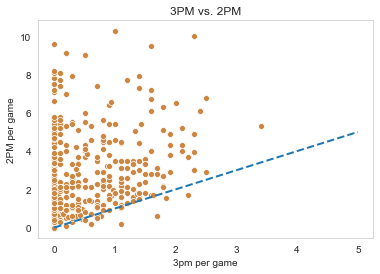

In [35]:
# Scatter plot showing the percentage of players who make more three pointers than two pointers on average per game.

ppg05 = ppg_05[['Player', '3P', '2P']]
ppg05 = ppg05.groupby(by='Player').mean().reset_index()
ppg05.columns = ['Player', 'three', 'two']

sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(x='three', y='two', data=ppg05, color='peru');
plt.xlabel('3pm per game')
plt.ylabel('2PM per game')
ax.set_title('3PM vs. 2PM')
plt.plot([0, 5], [0, 5], '--', linewidth=2);

temp = len(ppg05[ppg05['three'] > ppg05['two']])
length = len(ppg05)
perc = temp/length
print(str(round(perc*100, 2)) + 
      '% of players in the 2005 NBA season on average per game scored more 3 pointers than two pointers')

3.74% of players in the 1995 NBA season on average per game scored more 3 pointers than two pointers


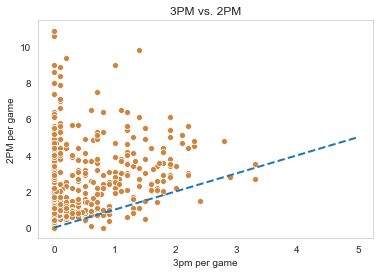

In [36]:
# Scatter plot showing the percentage of players who make more three pointers than two pointers on average per game.

ppg95 = ppg_95[['Player', '3P', '2P']]
ppg95 = ppg95.groupby(by='Player').mean().reset_index()
ppg95.columns = ['Player', 'three', 'two']

sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(x='three', y='two', data=ppg95, color='peru');
plt.xlabel('3pm per game')
plt.ylabel('2PM per game')
ax.set_title('3PM vs. 2PM')
plt.plot([0, 5], [0, 5], '--', linewidth=2);

temp = len(ppg95[ppg95['three'] > ppg95['two']])
length = len(ppg95)
perc = temp/length
print(str(round(perc*100, 2)) + 
      '% of players in the 1995 NBA season on average per game scored more 3 pointers than two pointers')

0.0% of players in the 1985 NBA season on average per game scored more 3 pointers than two pointers


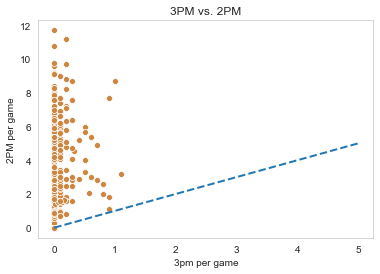

In [37]:
# Scatter plot showing the percentage of players who make more three pointers than two pointers on average per game.

ppg85 = ppg_85[['Player', '3P', '2P']]
ppg85 = ppg85.groupby(by='Player').mean().reset_index()
ppg85.columns = ['Player', 'three', 'two']

sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(x='three', y='two', data=ppg85, color='peru');
plt.xlabel('3pm per game')
plt.ylabel('2PM per game')
ax.set_title('3PM vs. 2PM')
plt.plot([0, 5], [0, 5], '--', linewidth=2);

temp = len(ppg85[ppg85['three'] > ppg85['two']])
length = len(ppg85)
perc = temp/length
print(str(round(perc*100, 2)) + 
      '% of players in the 1985 NBA season on average per game scored more 3 pointers than two pointers')

0.0% of players in the 1975 NBA season on average per game scored more 3 pointers than two pointers


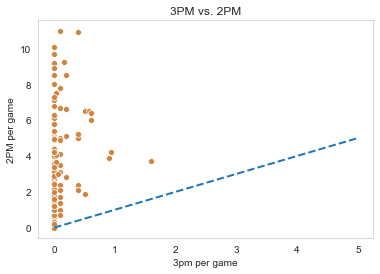

In [38]:
# Scatter plot showing the percentage of players who make more three pointers than two pointers on average per game.

ppg75 = ppg_75[['Player', '3P', '2P']]
ppg75 = ppg75.groupby(by='Player').mean().reset_index()
ppg75.columns = ['Player', 'three', 'two']

sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(x='three', y='two', data=ppg75, color='peru');
plt.xlabel('3pm per game')
plt.ylabel('2PM per game')
ax.set_title('3PM vs. 2PM')
plt.plot([0, 5], [0, 5], '--', linewidth=2);

temp = len(ppg75[ppg75['three'] > ppg75['two']])
length = len(ppg75)
perc = temp/length
print(str(round(perc*100, 2)) + 
      '% of players in the 1975 NBA season on average per game scored more 3 pointers than two pointers')

In [39]:
# Creating a function to help me group together league averages by season and to create a new dataframe 
# with the season as the index. This will help me save a lot of work and make plotting the heatmap easier. 
# All I am doing here is essentially getting the average for every feature per season and making a new dataframe.

def heat_map_helper_ppg(): 
    dataFrames = [ppg_75, ppg_85, ppg_95, ppg_05, ppg_15, ppg_18]
    years = ['1975', '1985', '1995', '2005', '2015', '2018']
    count = 0
    data = []
    
    for i in dataFrames:
        temp = list(i.mean(axis=0))
        temp.insert(0, years[count])
        
        data.append(temp)
        
        count += 1
    
    cols = list(ppg_18.mean(axis=0).index)
    cols.insert(0, 'Season')
    
    return data, cols


def heat_map_helper_tpg(): 
    dataFrames = [nba75, nba85, nba95, nba05, nba15, nba18]
    years = ['1975', '1985', '1995', '2005', '2015', '2018']
    count = 0
    data = []
    
    for i in dataFrames:
        i.at[len(i) - 1, 'WL%'] = round(np.mean(i.loc[:, 'WL%']), 2)
        
        temp = list(i.dropna(axis=1).iloc[-1])
        temp[0] = years[count]
        
        data.append(temp)
        
        count += 1
    
    cols = list(nba75.dropna(axis=1).columns)
    cols[0] = 'Season'
    
    return data, cols

In [40]:
# Calling the above defined functions to get my corresponding data and columns so I can make them into 
# pandas dataframe objects. 

datatpg, colstpg = heat_map_helper_tpg()
datappg, colsppg = heat_map_helper_ppg()

leagueAveragestpg = pd.DataFrame(datatpg, columns=colstpg)
leagueAveragesppg = pd.DataFrame(datappg, columns=colsppg)

In [41]:
# Here I am setting the season as the index, dropping columns that will skew the visual, filling Nan's should there
# exist any, and sorting the dataframes by the average number of 3 pointers attempted. I am also normalizing the data
# as well since it will also throw off the scale for the heatmap since number of 2 pointers on average will be higher
# than, say, the number of blocks.

leagueAveragestpg.index = leagueAveragestpg['Season']
leagueAveragestpg = leagueAveragestpg.drop(['Season', 'Age', 'FT', 'FTA', 'MP', 'WL%', 'TS%',
                                            'FT%', 'ORB', 'DRB', 'PF', 'PTS', 'FG', 'FGA', 'FG%'], axis=1)
leagueAveragestpg = leagueAveragestpg.fillna(0)
leagueAveragestpg = leagueAveragestpg.sort_values('3PA', ascending=False)

col_normalize = list(leagueAveragestpg.columns)
for i in col_normalize:
    col_sum = sum(leagueAveragestpg[i])
    leagueAveragestpg[i] = leagueAveragestpg[i]/col_sum
    
    
leagueAveragesppg.index = leagueAveragesppg['Season']
leagueAveragesppg = leagueAveragesppg.drop(['Season', 'Age', 'eFG%', 'FT', 'FTA', 'MP',
                                            'FT%', 'ORB', 'DRB', 'PF', 'PTS', 'FG', 'FGA', 'FG%'], axis=1)
leagueAveragesppg = leagueAveragesppg.fillna(0)
leagueAveragesppg = leagueAveragesppg.sort_values('3PA', ascending=False)

col_normalize = list(leagueAveragesppg.columns)
for i in col_normalize:
    col_sum = sum(leagueAveragesppg[i])
    leagueAveragesppg[i] = leagueAveragesppg[i]/col_sum

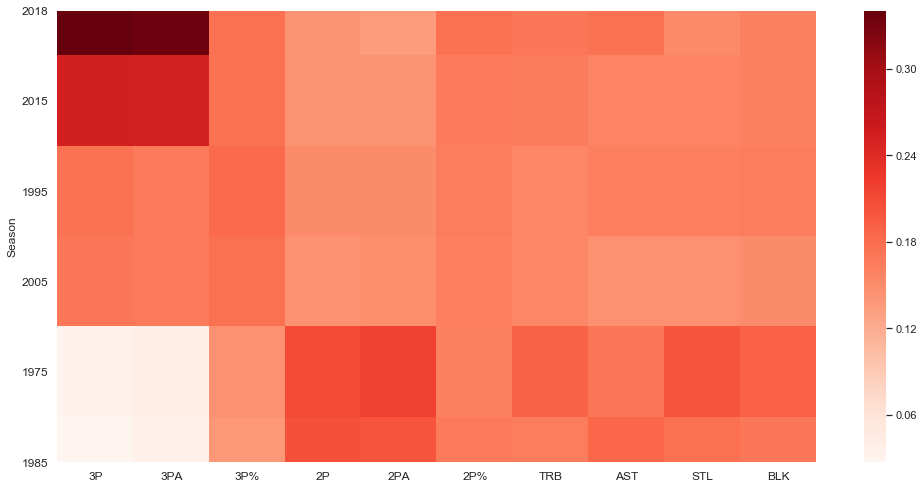

In [42]:
sns.set(rc={'figure.figsize':(14,7)})
cmap = sns.cm.rocket_r
sns.heatmap(leagueAveragestpg, cmap='Reds')
plt.xticks(size=12);
plt.yticks(size=12);
plt.tight_layout();
plt.yticks(rotation=0);
plt.xticks(rotation=0);

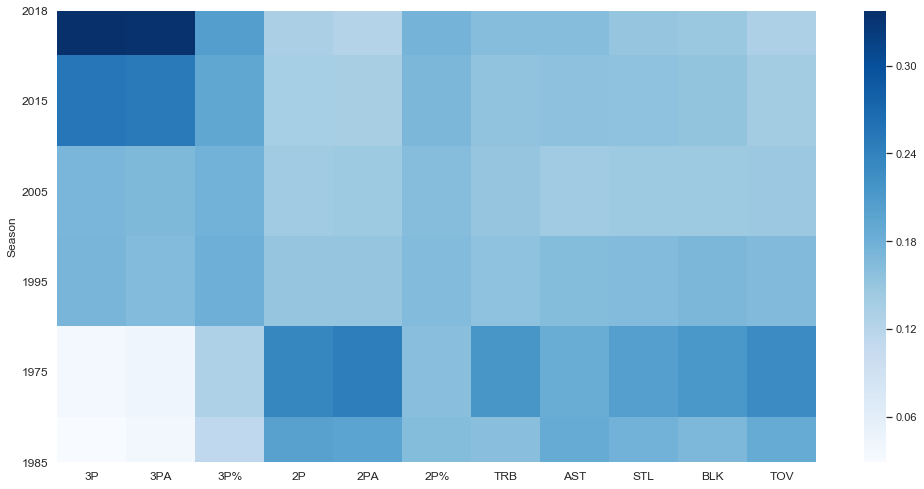

In [43]:
sns.set(rc={'figure.figsize':(14,7)})
cmap = sns.cm.rocket_r
sns.heatmap(leagueAveragesppg, cmap='Blues')
plt.xticks(size=12);
plt.yticks(size=12);
plt.tight_layout();
plt.yticks(rotation=0);
plt.xticks(rotation=0);

In [44]:
# Gathering a list of some of my favorite players to compare them against one another in all aspects

players75 = ['Julius Erving']
players85 = ['Charles Barkley', 'Larry Bird', 'Magic Johnson', 'Kareem Abdul-Jabbar']
players95 = ['Michael Jordan', 'Scottie Pippen', 'Dennis Rodman', 'Jason Kidd', 'Steve Kerr']
players05 = ['Allen Iverson', 'Kobe Bryant', 'Ray Allen', 'Kevin Garnett', 'Dwight Howard', 'Steve Nash', 
             'Chris Paul', "Shaquille O'Neal"]
players15 = ['Stephen Curry', 'LeBron James']
players18 = ['Giannis Antetokounmpo', 'James Harden', 'Russell Westbrook']

# This function goes through each df that contains my favorite player and selects the entire row and 
# concatenates all the relavant information into a single dataframe to prepare for a heatmap. After getting the data
# into a pandas datafame I select the columns I would like to use as my features for the heatmap and normalize them.
# Finally I sort by the points attribute (decreasing).

def playersdf():
    dfs = [ppg_75, ppg_85, ppg_95, ppg_05, ppg_15, ppg_18]
    years = ['1975', '1985', '1995', '2005', '2015', '2018']
    players = [players75, players85, players95, players05, players15, players18]
    count = 0
    data = []
    
    for i in dfs:
        for j in players[count]:
            temp = list(i[i['Player'] == j].iloc[0])
            temp.insert(0, years[count])
            data.append(temp)
        count += 1
    
    cols = list(ppg_18.columns)
    cols.insert(0, 'Season')
    
    return data, cols

data, cols = playersdf()

favPlayers = pd.DataFrame(data, columns=cols)

favPlayers = favPlayers[['Player', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', 'TRB', 'AST',
                 'STL', 'BLK', 'TOV']]

favPlayers.index = favPlayers['Player']
favPlayers = favPlayers.drop('Player', axis=1)
favPlayers = favPlayers.fillna(0)

col_normalize = ['PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', 'TRB',
       'AST', 'STL', 'BLK', 'TOV']
for i in col_normalize:
    col_sum = sum(favPlayers[i])
    favPlayers[i] = favPlayers[i]/col_sum
    
favPlayers = favPlayers.sort_values('PTS', ascending=False)

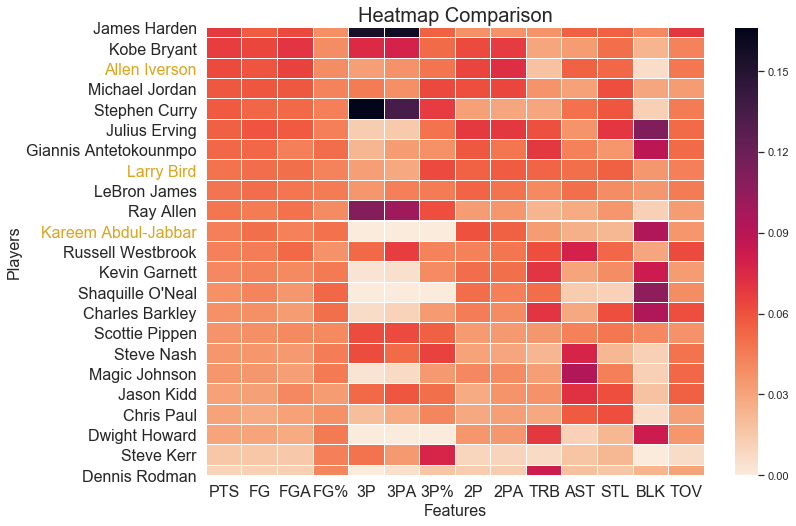

In [45]:
# Heatmap Comparison of some of my favortie players and relevant attributes.

sns.set(rc={'figure.figsize':(11.7,7)})
cmap = sns.cm.rocket_r
#pal = sns.dark_palette("Navy", as_cmap=True)
#cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(favPlayers, cmap=cmap, linewidth=.025)
prop = 'sans serif'
plt.xticks(fontproperties=prop, size=16);
plt.yticks(fontproperties=prop, size=16);
plt.gca().get_yticklabels()[2].set_color("goldenrod");
plt.gca().get_yticklabels()[7].set_color("goldenrod");
plt.gca().get_yticklabels()[10].set_color("goldenrod");
plt.tight_layout()
plt.ylabel('Players', size=16)
plt.xlabel('Features', size=16)
plt.title('Heatmap Comparison', size=20);

## NLTK

In [46]:
# Gathering all players into text format. A string of all players from 1950 to 2017. Some records maybe missing, but
# for the most part this is accurate. The functions just go through dataframes select the players and put them into a
# collective text.

def players_wordcloud_helper():
    dfs = [ppg_75, ppg_85, ppg_95, ppg_05, ppg_15, ppg_18]
    totalPlayers = []
    for i in dfs:
        players = list(set(i['Player']))
        for j in range(len(players)): 
            players[j] = players[j].replace(' ', '_')
        totalPlayers.extend(players)
    text = ''
    for i in totalPlayers:
        text += i
        text += ' '
    return text

text1 = players_wordcloud_helper()

def salaries_wordcloud_helper():
    df = salaries
    players = list(salaries['Player'])
    for i in range(len(players)):
        players[i] = players[i].replace(' ', '_')
        players[i] = players[i].replace('\\', '')
    
    text = ''
    for i in players:
        text += i
        text += ' '
    return text

text2 = salaries_wordcloud_helper()

In [47]:
# Getting a frequency distribution using NLTK, more to come when I get better text data for the NBA. All I have
# currently are players names.

freq = nltk.FreqDist(text2)
print(len(freq))
print(freq.most_common(20))

57
[('e', 12954), ('_', 11924), ('a', 11882), (' ', 11837), ('n', 11156), ('r', 10735), ('o', 9775), ('i', 8935), ('l', 7451), ('s', 6491), ('t', 4684), ('h', 3517), ('d', 3516), ('y', 3479), ('c', 3013), ('u', 2988), ('m', 2833), ('k', 2353), ('J', 2297), ('M', 2261)]


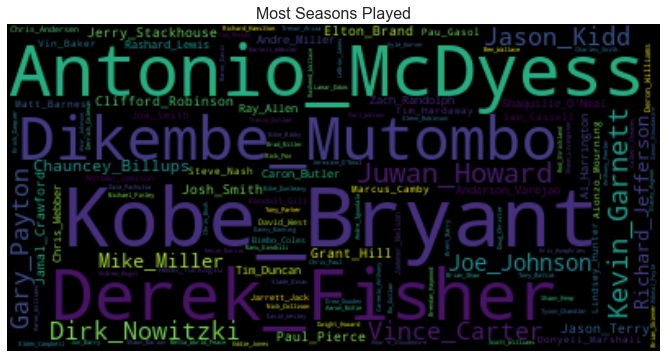

In [48]:
# Creating a wordcloud to show the frequency of the players from the 1950 to 2017 seasons. The players with the 
# highest count will be the players with the longest seasons played. However there are some records missing. 
# For instance, I know for a fact Vince Carter has the longest career, yet the wordcloud shows this to be Kobe Bryant,
# although Vince Carter does appear.

wc = WordCloud(collocations=False).generate(text2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Seasons Played', size=16);

## PCA

u shape:  (10, 10)
s shape:  [2.47701412e+01 1.67713022e+01 5.66362736e+00 3.42771381e+00
 2.52697984e+00 2.32816515e+00 1.41844383e+00 7.14454841e-01
 6.56737755e-01 1.12373103e-14]
vt shape:  (10, 26)

total_variance: 953.422 should approximately equal the sum of feature variances: 953.422


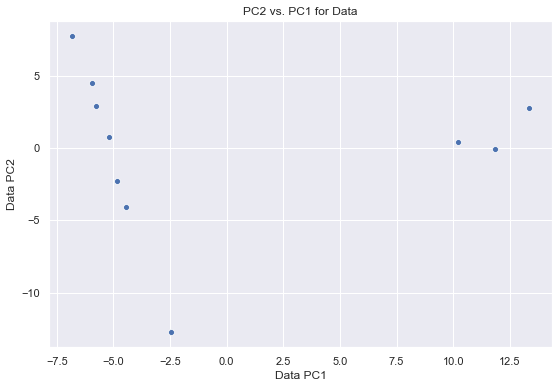

In [49]:
# Perparing datasets for PCA

n75 = nba75.drop('Team', axis=1).fillna(0)
n = n75.shape[0]
n75_mean = np.average(n75, axis=0)
normalized_features = (n75 - n75_mean) / n**(1/2)

u, s, vt = np.linalg.svd(normalized_features, full_matrices=False)
print('u shape: ', u.shape)
print('s shape: ', s)
print('vt shape: ', vt.shape)

print('')

total_variance = sum(s**2)
print("total_variance: {:.3f} should approximately equal the sum of feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(n75, axis=0))))

n75_2d = np.dot(normalized_features, vt[:2, :].T)
plt.figure(figsize=(9, 6))
plt.title("PC2 vs. PC1 for Data")
plt.xlabel("Data PC1")
plt.ylabel("Data PC2")
sns.scatterplot(n75_2d[:, 0], n75_2d[:, 1]);#, hue=iris_target);

2D Variance:  0.9385522834523122


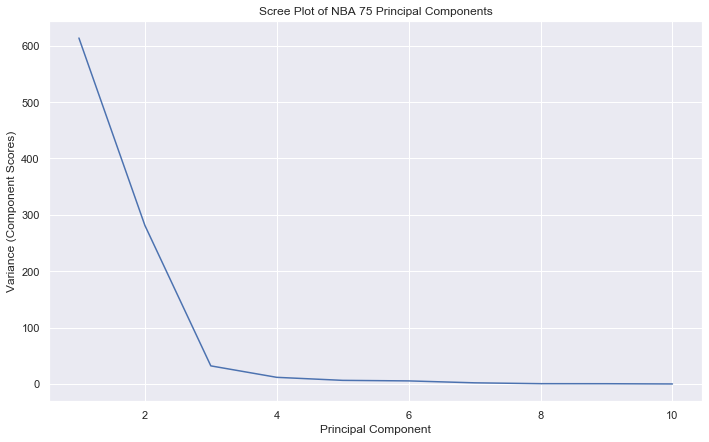

In [50]:
# Plotting the two dimensional data variance. This is very basic PCA and I hope to go more in depth and advanced
# later on.

two_dim_variance = sum(s[:2]**2) / total_variance
print('2D Variance: ', two_dim_variance)

plt.title("Scree Plot of NBA 75 Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance (Component Scores)")
plt.plot([1,2,3,4,5,6,7,8,9,10], s**2);

# Final Takeaway

In [51]:
# NBA players in the earlier years (i.e. 1970s to 1980s) were taking a lot more 2 point shots than 3 point shots. 
# As a result, the players were more concentrated in the area enclosed within the 3 point line. This may explain why 
# there were a lot more personal fouls, steals, and blocks because the players were physically closer together. 
# Today, however, players are much more spaced out and concentrated in two main areas. One being the area dircetly 
# under the basket and the other being the 3 point line itself. This can be attributed to the fact that 3 point shots
# and the 2 point dunk have a much higher average success rate than the regular 2 point shot. In other words, the 2 
# point dunk and the 3 point shot give teams the most bang for their buck. 